/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


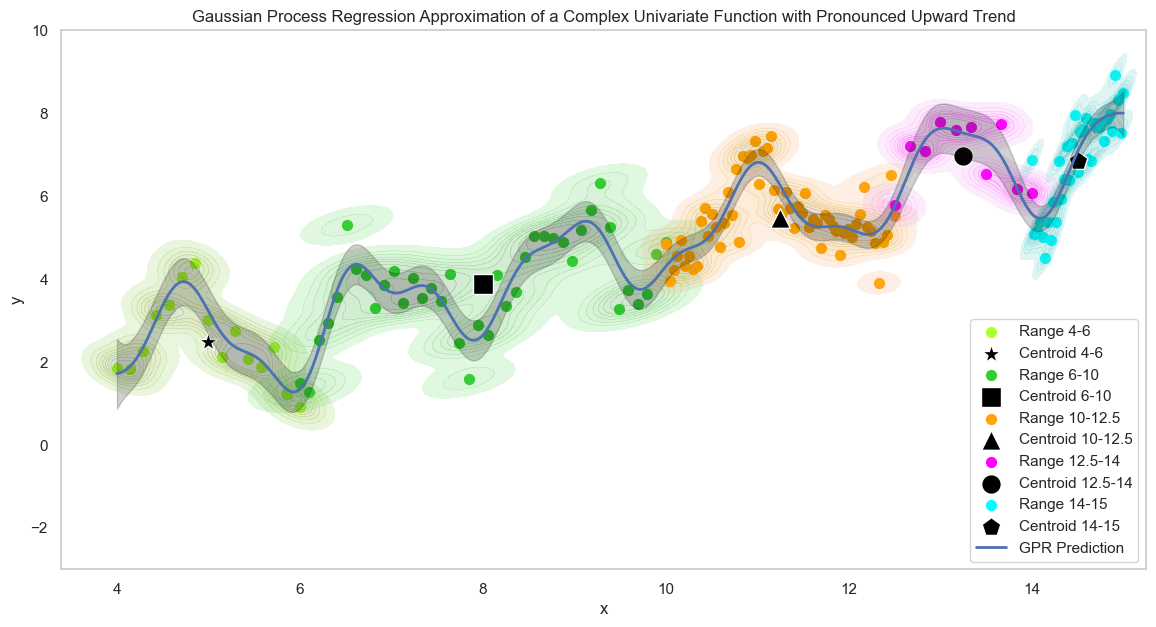

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define a modified complex univariate function with a more pronounced upward trend
def complex_function(x):
    return 0.5 * x + np.sin(3 * x) + 0.5 * np.sin(7 * x) + 0.3 * np.sin(11 * x)

# Generate unevenly distributed sample points
np.random.seed(42)
ranges = [
    (4, 6, 15),
    (6, 10, 40),
    (10, 12.5, 60),
    (12.5, 14, 10),
    (14, 15, 35)
]
colors = [
    'greenyellow',
    'limegreen',
    'orange',
    'fuchsia',
    'cyan'
]
markers = ['*', 's', '^', 'o', 'p']

x_train = np.hstack([np.linspace(start, end, num) for start, end, num in ranges])
y_train = complex_function(x_train)

# Add noise
y_train_noisy = y_train + np.random.normal(0, 0.5, size=x_train.shape)

# Fit a Gaussian Process Regression
# Define the kernel: ConstantKernel * RBF
kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.5**2)

# Train the GPR model
gp.fit(x_train[:, np.newaxis], y_train_noisy)

# Predict on a range of points
x_pred = np.linspace(4, 15, 1000)
y_pred, sigma = gp.predict(x_pred[:, np.newaxis], return_std=True)

# Plot the results
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot the noisy observations with different colors and add KDE plots
start_idx = 0
marker_size = 200  # Uniform marker size for centroids
for (start, end, num), color, marker in zip(ranges, colors, markers):
    end_idx = start_idx + num
    x_range = x_train[start_idx:end_idx]
    y_range = y_train_noisy[start_idx:end_idx]
    plt.scatter(x_range, y_range, c=color, label=f"Range {start}-{end}", s=50)
    sns.kdeplot(x=x_range, y=y_range, fill=True, color=color, alpha=0.2, bw_adjust=0.5)
    
    # Calculate the centroid of the KDE plot
    centroid_x = np.mean(x_range)
    centroid_y = np.mean(y_range)
    plt.scatter(centroid_x, centroid_y, c='black', marker=marker, s=marker_size, edgecolor='white', label=f"Centroid {start}-{end}")
    
    start_idx = end_idx

# Plot the GPR prediction
plt.plot(x_pred, y_pred, 'b', lw=2, label="GPR Prediction")
plt.fill_between(x_pred, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='k')
plt.ylim(-3, 10) 

# Remove grid lines
plt.grid(False)

# Remove the x and y axis grids
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)

plt.legend()
plt.title("Gaussian Process Regression Approximation of a Complex Univariate Function with Pronounced Upward Trend")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


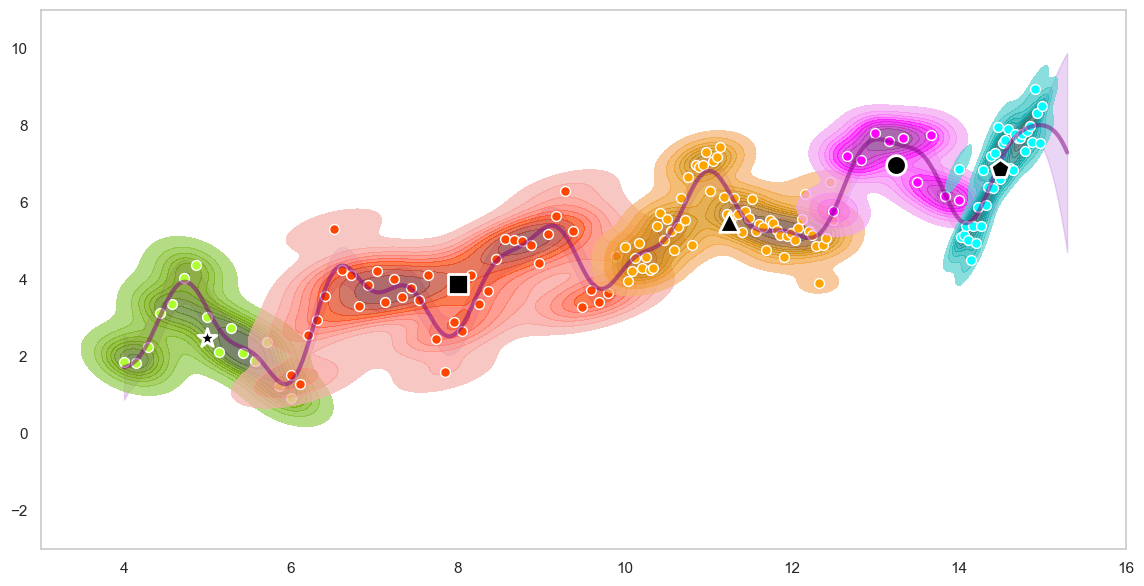

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define a modified complex univariate function with a more pronounced upward trend
def complex_function(x):
    return 0.5 * x + np.sin(3 * x) + 0.5 * np.sin(7 * x) + 0.3 * np.sin(11 * x)

# Generate unevenly distributed sample points
np.random.seed(42)
ranges = [
    (4, 6, 15),
    (6, 10, 40),
    (10, 12.5, 60),
    (12.5, 14, 10),
    (14, 15, 35)
]
colors = [
    'greenyellow',
    'orangered',
    'orange',
    'fuchsia',
    'cyan'
]
markers = ['*', 's', '^', 'o', 'p']

x_train = np.hstack([np.linspace(start, end, num) for start, end, num in ranges])
y_train = complex_function(x_train)

# Add noise
y_train_noisy = y_train + np.random.normal(0, 0.5, size=x_train.shape)

# Fit a Gaussian Process Regression
# Define the kernel: ConstantKernel * RBF
kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.5**2)

# Train the GPR model
gp.fit(x_train[:, np.newaxis], y_train_noisy)

# Predict on a range of points
x_pred = np.linspace(4, 15.3, 1000)
y_pred, sigma = gp.predict(x_pred[:, np.newaxis], return_std=True)

# Plot the results
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot the GPR prediction
plt.plot(x_pred, y_pred, 'purple', lw=3, alpha=0.5)
plt.fill_between(x_pred, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='darkorchid')#color='k')
plt.xlim(3, 16) 
plt.ylim(-3, 11) 

# Plot the noisy observations with different colors and add KDE plots
start_idx = 0
marker_size = 200  # Uniform marker size for centroids
for (start, end, num), color, marker in zip(ranges, colors, markers):
    end_idx = start_idx + num
    x_range = x_train[start_idx:end_idx]
    y_range = y_train_noisy[start_idx:end_idx]
    
    # KDE plot with custom styles
    sns.kdeplot(
        x=x_range,
        y=y_range,
        color=color,
        fill=True,
        alpha=0.7,
        bw_adjust=0.7,
    )
    
    # Calculate the centroid of the KDE plot
    centroid_x = np.mean(x_range)
    centroid_y = np.mean(y_range)
    plt.scatter(x_range, y_range, c=color, label=f"Range {start}-{end}", edgecolor='white', s=50)
    #plt.scatter(centroid_x, centroid_y, c='black', marker=marker, s=marker_size, edgecolor='white', label=f"Centroid {start}-{end}")

    # Plot centroid with even larger size and white edge
    plt.scatter(centroid_x, centroid_y, c='black', marker=marker, 
                s=marker_size, edgecolor='white', linewidth=2, 
                label=f"Centroid {start}-{end}", zorder=5)

    start_idx = end_idx



# Remove grid lines
plt.grid(False)

# Remove the x and y axis grids
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)


plt.show()


/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


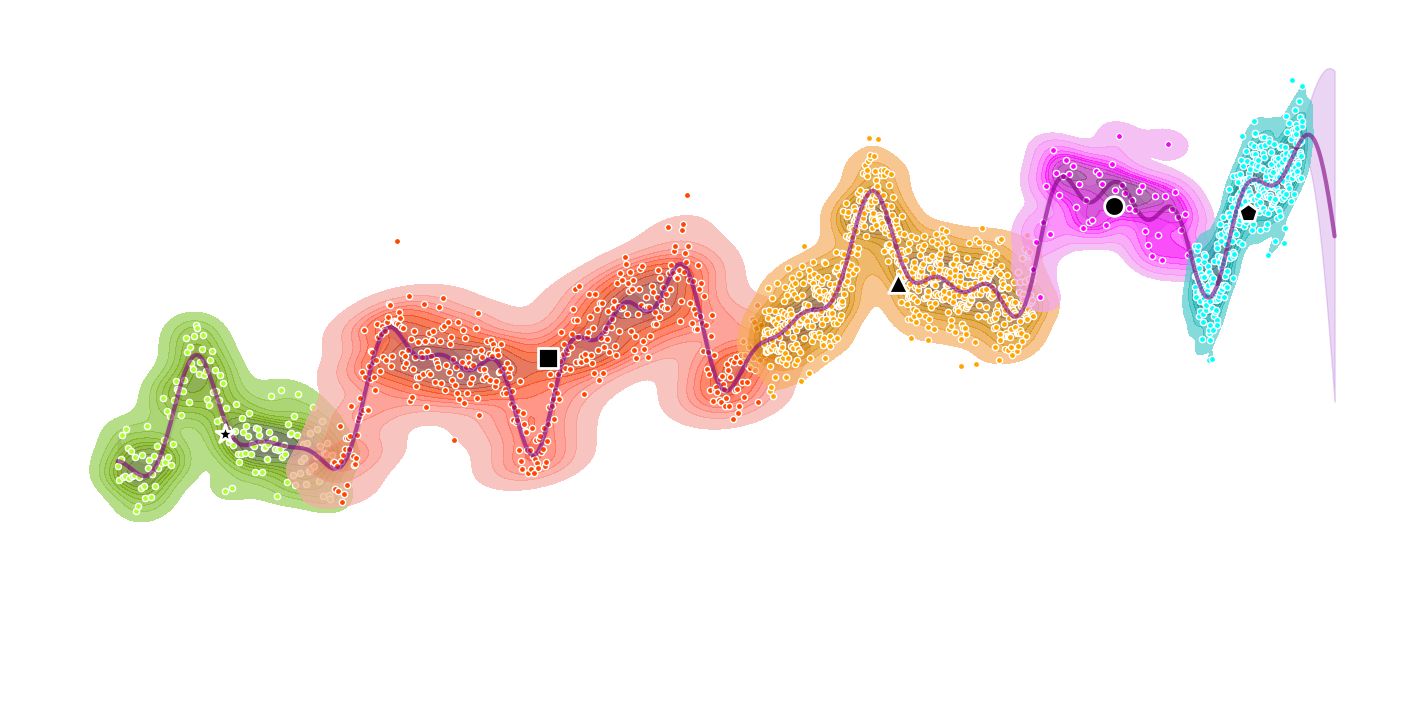

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# ... [Keep the existing function and data generation code] ...

# Define a modified complex univariate function with a more pronounced upward trend
def complex_function(x):
    return 0.5 * x + np.sin(3 * x) + 0.5 * np.sin(7 * x) + 0.3 * np.sin(11 * x)

# Generate unevenly distributed sample points
np.random.seed(42)
"""ranges = [
    (4, 6, 15),
    (6, 10, 40),
    (10, 12.5, 70),
    (12.5, 14, 5),
    (14, 15, 35)
]"""
ranges = [
    (4, 6, 150),
    (6, 10, 400),
    (10, 12.5, 700),
    (12.5, 14, 50),
    (14, 15, 350)
]
colors = [
    'greenyellow',
    'orangered',
    'orange',
    'fuchsia',
    'cyan'
]
markers = ['*', 's', '^', 'o', 'p']

x_train = np.hstack([np.linspace(start, end, num) for start, end, num in ranges])
y_train = complex_function(x_train)

# Add noise
y_train_noisy = y_train + np.random.normal(0, 0.5, size=x_train.shape)

# Fit a Gaussian Process Regression
# Define the kernel: ConstantKernel * RBF
kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.5**2)

# Train the GPR model
gp.fit(x_train[:, np.newaxis], y_train_noisy)

# Predict on a range of points
x_pred = np.linspace(4, 15.3, 1000)
y_pred, sigma = gp.predict(x_pred[:, np.newaxis], return_std=True)


# Plot the results
plt.figure(figsize=(14, 7))
sns.set_style("white")  # Use white style to remove background grid

# Plot the GPR prediction
plt.plot(x_pred, y_pred, 'purple', lw=3, alpha=0.6)
plt.fill_between(x_pred, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='darkorchid')
plt.xlim(3, 16) 
plt.ylim(-3, 11) 

# Plot the noisy observations with different colors and add KDE plots
start_idx = 0
marker_size = 200  # Uniform marker size for centroids
for (start, end, num), color, marker in zip(ranges, colors, markers):
    end_idx = start_idx + num
    x_range = x_train[start_idx:end_idx]
    y_range = y_train_noisy[start_idx:end_idx]
    
    # KDE plot with custom styles
    sns.kdeplot(
        x=x_range,
        y=y_range,
        color=color,
        fill=True,
        alpha=0.7,
        bw_adjust=0.7,
    )
    
    # Calculate the centroid of the KDE plot
    centroid_x = np.mean(x_range)
    centroid_y = np.mean(y_range)
    plt.scatter(x_range, y_range, c=color, edgecolor='white', s=20)

    # Plot centroid with even larger size and white edge
    plt.scatter(centroid_x, centroid_y, c='black', marker=marker, 
                s=marker_size, edgecolor='white', linewidth=2, 
                zorder=5)

    start_idx = end_idx

# Remove all ticks and labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=False, right=False, left=False, labelleft=False)

# Remove the axes
plt.axis('off')

# Adjust the plot to fill the figure
plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()

/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


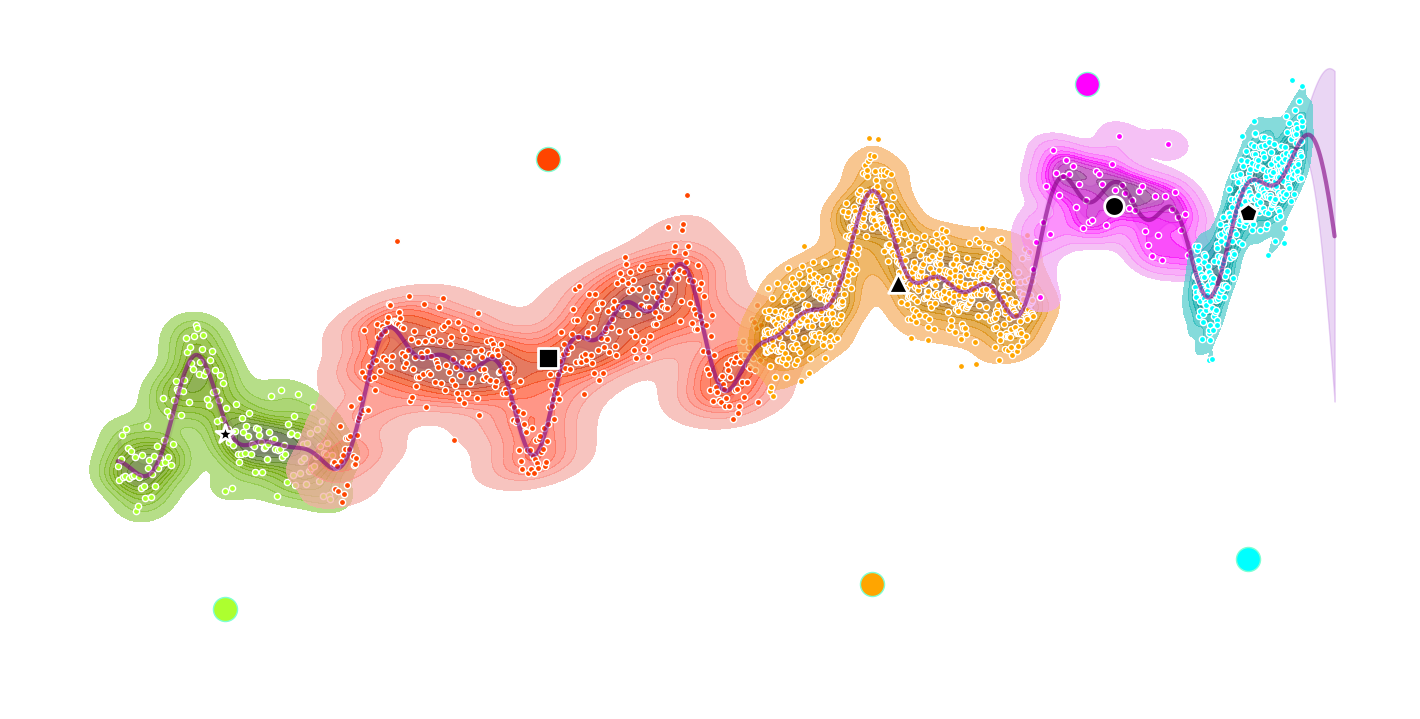

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# ... [Keep the existing function and data generation code] ...
# Define a modified complex univariate function with a more pronounced upward trend
def complex_function(x):
    return 0.5 * x + np.sin(3 * x) + 0.5 * np.sin(7 * x) + 0.3 * np.sin(11 * x)

# Generate unevenly distributed sample points
np.random.seed(42)
"""
ranges = [
    (4, 6, 15),
    (6, 10, 40),
    (10, 12.5, 70),
    (12.5, 14, 5),
    (14, 15, 35)
]"""
ranges = [
    (4, 6, 150),
    (6, 10, 400),
    (10, 12.5, 700),
    (12.5, 14, 50),
    (14, 15, 350)
]
colors = [
    'greenyellow',
    'orangered',
    'orange',
    'fuchsia',
    'cyan'
]
markers = ['*', 's', '^', 'o', 'p']

x_train = np.hstack([np.linspace(start, end, num) for start, end, num in ranges])
y_train = complex_function(x_train)

# Add noise
y_train_noisy = y_train + np.random.normal(0, 0.5, size=x_train.shape)

# Fit a Gaussian Process Regression
# Define the kernel: ConstantKernel * RBF
kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.5**2)

# Train the GPR model
gp.fit(x_train[:, np.newaxis], y_train_noisy)

# Predict on a range of points
x_pred = np.linspace(4, 15.3, 1000)
y_pred, sigma = gp.predict(x_pred[:, np.newaxis], return_std=True)


# Define new outlier points (one for each distribution)
outliers = [
    (5, -1),    # For the greenyellow distribution
    (8, 8),    # For the orangered distribution
    (11, -0.5), # For the orange distribution
    (13, 9.5),  # For the fuchsia distribution
    (14.5, 0)   # For the cyan distribution
]

# Plot the results
plt.figure(figsize=(14, 7))
sns.set_style("white")

# Plot the GPR prediction
plt.plot(x_pred, y_pred, 'purple', lw=3, alpha=0.6)
plt.fill_between(x_pred, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='darkorchid')
plt.xlim(3, 16) 
plt.ylim(-3, 11) 

# Plot the noisy observations with different colors and add KDE plots
start_idx = 0
marker_size = 200  # Uniform marker size for centroids
for (start, end, num), color, marker, outlier in zip(ranges, colors, markers, outliers):
    end_idx = start_idx + num
    x_range = x_train[start_idx:end_idx]
    y_range = y_train_noisy[start_idx:end_idx]
    
    # KDE plot with custom styles
    sns.kdeplot(
        x=x_range,
        y=y_range,
        color=color,
        fill=True,
        alpha=0.7,
        bw_adjust=0.7,
    )
    
    # Calculate the centroid of the KDE plot
    centroid_x = np.mean(x_range)
    centroid_y = np.mean(y_range)
    plt.scatter(x_range, y_range, c=color, edgecolor='white', s=20)

    # Plot centroid with even larger size and white edge
    plt.scatter(centroid_x, centroid_y, c='black', marker=marker, 
                s=marker_size, edgecolor='white', linewidth=2, 
                zorder=5)
    
    # Plot the outlier point
    plt.scatter(outlier[0], outlier[1], c=color, edgecolor='aquamarine', s=300, zorder=6)

    start_idx = end_idx

# Remove all ticks and labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=False, right=False, left=False, labelleft=False)

# Remove the axes
plt.axis('off')

# Adjust the plot to fill the figure
plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()

/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


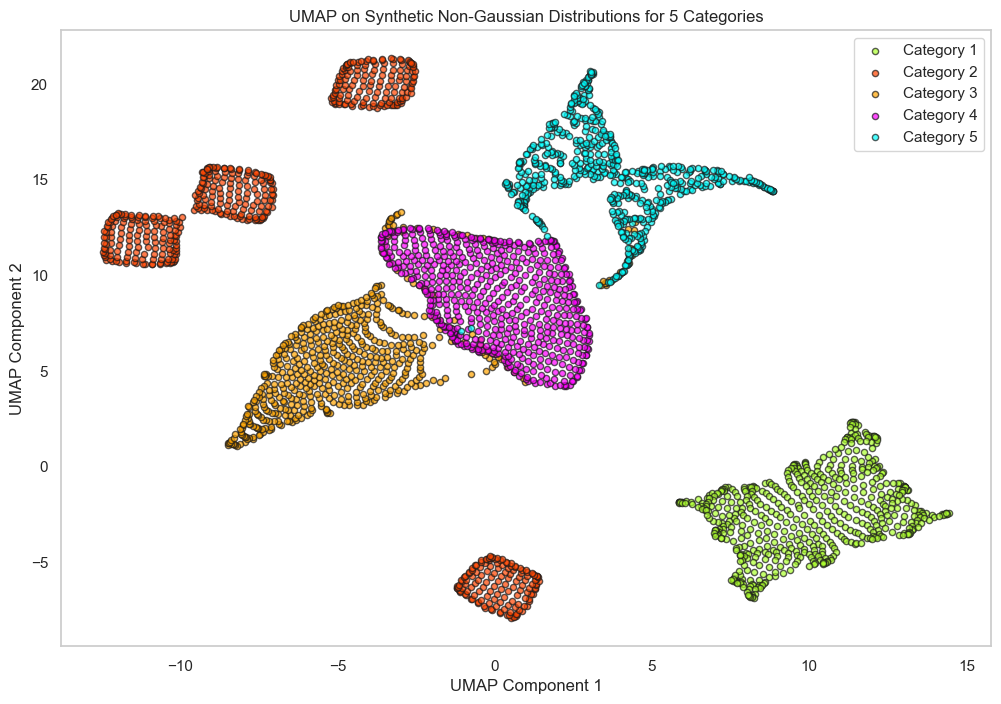

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic data for a specific category with a distinct transformation
def generate_category_data(n_samples, category):
    np.random.seed(42 + category)  # Different seed for each category
    x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    y = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    X, Y = np.meshgrid(x, y)
    X = X.flatten()
    Y = Y.flatten()
    
    # Apply a unique non-linear transformation for each category to ensure non-overlapping regions
    if category == 0:
        Z = np.sin(X * Y) + np.cos(Y) + 5 * category
    elif category == 1:
        Z = np.sign(X) * np.abs(X)**(1/3) + np.sign(Y) * np.abs(Y)**(1/3) + 5 * (category + 1)
    elif category == 2:
        Z = np.sinh(X) + np.cosh(Y) + 5 * (category + 2)
    elif category == 3:
        Z = np.tanh(X) + np.tanh(Y) + 5 * (category + 3)
    elif category == 4:
        Z = X * Y + np.random.normal(scale=0.3, size=X.shape) + 5 * (category + 4)
    
    return np.vstack([X, Y, Z]).T

# Parameters
n_samples_per_category = 600
n_categories = 5
colors = [
    'greenyellow',
    'orangered',
    'orange',
    'fuchsia',
    'cyan'
]

# Generate data for each category
X_total = []
y_total = []

for i in range(n_categories):
    X_category = generate_category_data(n_samples=n_samples_per_category, category=i)
    y_category = np.full(X_category.shape[0], i)  # Use the correct size here
    X_total.append(X_category)
    y_total.append(y_category)

# Concatenate all categories into a single dataset
X_total = np.vstack(X_total)
y_total = np.hstack(y_total)

# Apply UMAP for dimensionality reduction with adjusted parameters
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.3, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_total)

# Plot the results
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot for each category
for i in range(n_categories):
    mask = (y_total == i)  # Boolean index for each category
    plt.scatter(
        X_umap[mask, 0], 
        X_umap[mask, 1], 
        c=colors[i], 
        label=f'Category {i+1}', 
        s=20, 
        edgecolor='k', 
        alpha=0.7
    )

plt.title('UMAP on Synthetic Non-Gaussian Distributions for 5 Categories')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.grid(False)
plt.show()



/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


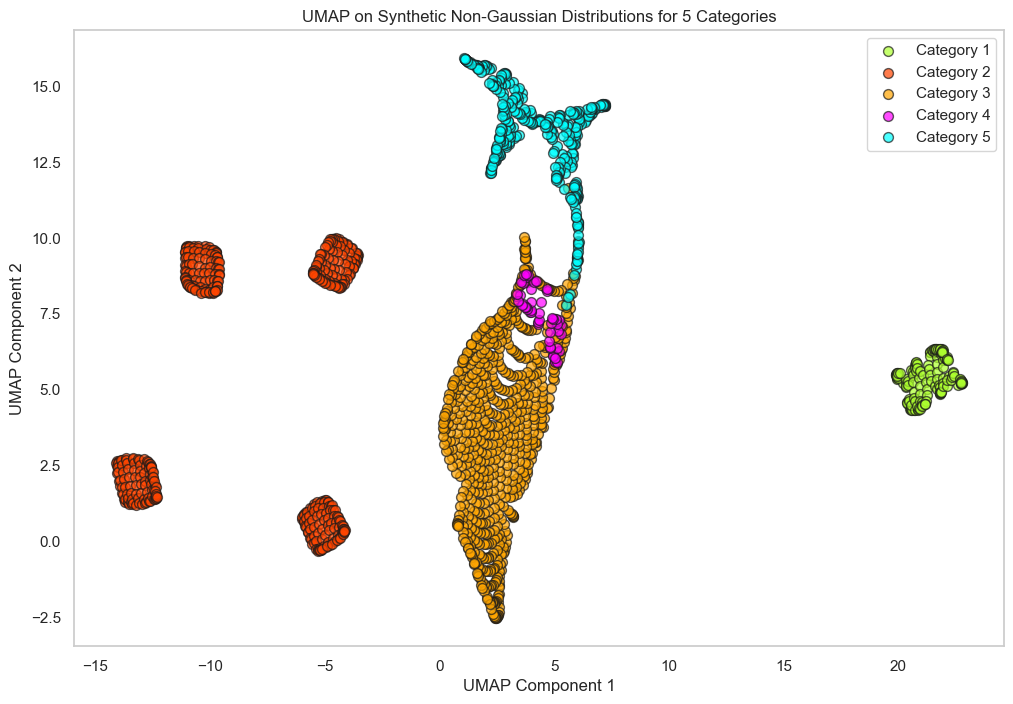

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic data for a specific category with a distinct transformation
def generate_category_data(n_samples, category):
    np.random.seed(42 + category)  # Different seed for each category
    x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    y = np.linspace(-3, 3, int(np.sqrt(n_samples)))
    X, Y = np.meshgrid(x, y)
    X = X.flatten()[:n_samples]
    Y = Y.flatten()[:n_samples]
    
    # Apply a unique non-linear transformation for each category to ensure non-overlapping regions
    if category == 0:
        Z = np.sin(X * Y) + np.cos(Y) + 5 * category
    elif category == 1:
        Z = np.sign(X) * np.abs(X)**(1/3) + np.sign(Y) * np.abs(Y)**(1/3) + 5 * (category + 1)
    elif category == 2:
        Z = np.sinh(X) + np.cosh(Y) + 5 * (category + 2)
    elif category == 3:
        Z = np.tanh(X) + np.tanh(Y) + 5 * (category + 3)
    elif category == 4:
        Z = X * Y + np.random.normal(scale=0.3, size=X.shape) + 5 * (category + 4)
    
    return np.vstack([X, Y, Z]).T

# Parameters
n_samples_per_category = [150, 400, 700, 50, 350]

n_categories = 5
colors = [
    'greenyellow',
    'orangered',
    'orange',
    'fuchsia',
    'cyan'
]

# Generate data for each category
X_total = []
y_total = []

for i in range(n_categories):
    X_category = generate_category_data(n_samples=n_samples_per_category[i], category=i)
    y_category = np.full(X_category.shape[0], i)  # Use the correct size here
    X_total.append(X_category)
    y_total.append(y_category)

# Concatenate all categories into a single dataset
X_total = np.vstack(X_total)
y_total = np.hstack(y_total)

# Apply UMAP for dimensionality reduction with adjusted parameters
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_total)

# Plot the results
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot for each category
for i in range(n_categories):
    mask = (y_total == i)  # Boolean index for each category
    plt.scatter(
        X_umap[mask, 0], 
        X_umap[mask, 1], 
        c=colors[i], 
        label=f'Category {i+1}', 
        s=50, 
        edgecolor='k', 
        alpha=0.7
    )

plt.title('UMAP on Synthetic Non-Gaussian Distributions for 5 Categories')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.grid(False)
plt.show()


/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/kvr226/miniconda3/envs/latent_msaprot_env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


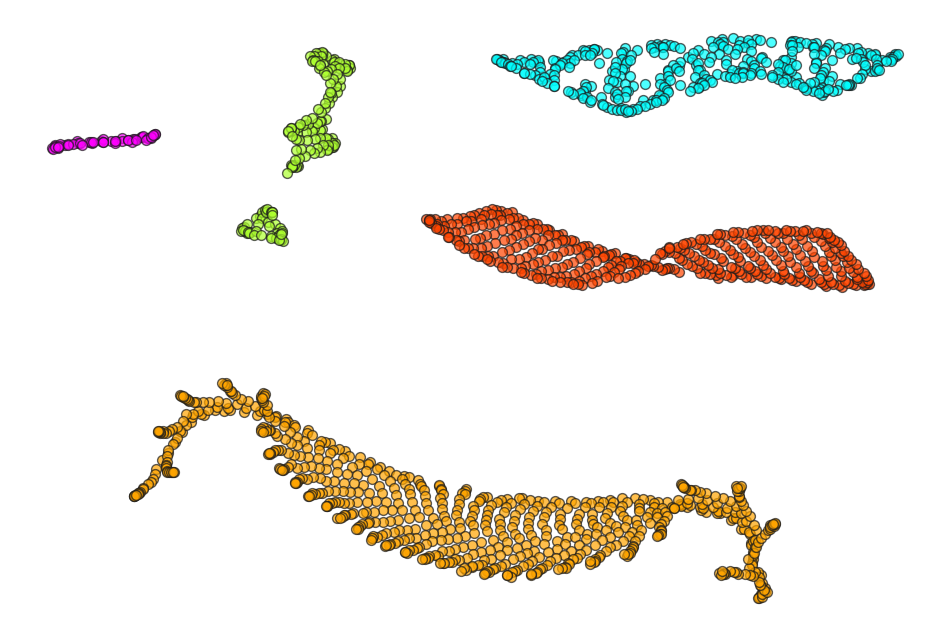

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Set random seed for reproducibility
np.random.seed(422)

# Function to generate synthetic data for a specific category with a distinct transformation
def generate_category_data(n_samples, category):
    np.random.seed(42 + category)  # Different seed for each category
    x = np.linspace(-3, 3, int(np.sqrt(n_samples)) + 5)
    y = np.linspace(-3, 3, int(np.sqrt(n_samples)) + 35)
    X, Y = np.meshgrid(x, y)
    X = X.flatten()[:n_samples]
    Y = Y.flatten()[:n_samples]
    
    # Apply a unique non-linear transformation for each category to ensure non-overlapping regions
    if category == 0:
        Z = np.sin(X * Y) + np.cos(Y) + 20 * category + X + Y
    elif category == 1:
        Z = np.sign(X) * np.abs(X)**(1/3) + np.sign(Y) * np.abs(Y)**(1/3) + 20 * (category + 1) + X + Y
    elif category == 2:
        Z = np.sinh(X) + np.cosh(Y) + 20 * (category + 2) + X + Y
    elif category == 3:
        Z = np.tanh(X) + np.tanh(Y) + 20 * (category + 3) + X + Y
    elif category == 4:
        Z = X * Y + np.random.normal(scale=0.3, size=X.shape) + 20 * (category + 4) + X + Y
    
    return np.vstack([X, Y, Z]).T

# Parameters
n_samples_per_category = [150, 400, 700, 50, 350]
n_categories = 5
colors = [
    'greenyellow',
    'orangered',
    'orange',
    'fuchsia',
    'cyan'
]

# Generate data for each category
X_total = []
y_total = []

for i in range(n_categories):
    X_category = generate_category_data(n_samples=n_samples_per_category[i], category=i)
    y_category = np.full(X_category.shape[0], i)  # Use the correct size here
    X_total.append(X_category)
    y_total.append(y_category)

# Concatenate all categories into a single dataset
X_total = np.vstack(X_total)
y_total = np.hstack(y_total)

# Apply UMAP for dimensionality reduction with adjusted parameters
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.4, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_total)

# Plot the results
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot for each category
for i in range(n_categories):
    mask = (y_total == i)  # Boolean index for each category
    plt.scatter(
        X_umap[mask, 0], 
        X_umap[mask, 1], 
        c=colors[i], 
        label=f'Category {i+1}', 
        s=50, 
        edgecolor='k', 
        alpha=0.7
    )

# Remove all ticks and labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=False, right=False, left=False, labelleft=False)

# Remove the axes
plt.axis('off')
plt.grid(False)
plt.show()
